<div class="alert alert-block alert-warning">
В данном исследовании представлена таблца 'Games' с очень важной информацией для интернет-магазина о компьютерных играх, которая включает в себя исторические данные о продаже игр, оценки пользователей и экспертов, а также жанры и платформы для игр.
<div class="alert alert-block alert-success">
<p><b>Данное исследование разделим на несколько частей:</b></p>

<b>Часть 1.Изучение общей информации:</b>
<p><b>1)</b>Изучение файлов с данными, получение общей информации, загрузка библиотек.</p>

<b>Часть 2.Предобратка данных.</b>
<p><b>1)</b>Нахождение и ликвидация пропусков:</p>
<p><b>2)</b>Приведение данных к нужным типам.</p>
<p><b>3)</b>Подсчёт суммарных продаж во всех регионах.</p>

<b>Часть 3.Исследовательский анализ данных:</b>
<p><b>1)</b>Изучение информации о разнице выпущенных игр в разные годы.</p>
<p><b>2)</b>Изучить зависимость продаж от платформ.</p>
<p><b>3)</b>Найти актуальный период, который поможет построить прогноз для 2017 года.</p>
<p><b>4)</b>Построить график "ящик с усами" по глобальным продажам игр в разбивке по платформам.</p>
<p><b>5)</b>Выяснить зависимость продаж от отзывов пользователей и критиков.</p>
<p><b>6)</b>Выяснить зависимость продаж от жанра игры.</p>

<b>Часть 4.Составление портрета пользователя каждого региона:</b>
<p><b>1)</b>Определить для пользователя каждого региона самые популярные платформы и жанры.</p>
<p><b>2)</b>Выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе.</p>

<b>Часть 5.Проверка следующих гипотез:</b>
<p><b>1)</b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</p>
<p><b>2)</b>Средние пользовательские рейтинги жанров Action и Sports разные.</p>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/datasets/games.csv')
display(df.head())
print(df.info())
df.columns = [x.lower() for x in df.columns]
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Просмотрим данную нам таблицу с необходимой информацией с помощью метода read_csv(); узнаем информацию о типах и количестве строк с данными в столбцах с помощью метода info(). Для удобства все буквы в названии столбцов приведём к нижнему регистру.

In [3]:
print(df.isna().sum())
df.loc[df['user_score'] == 'tbd', 'user_score'] = None
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y').dt.year
df['user_score'] = pd.to_numeric(df['user_score'])
df['name'] = df['name'].fillna('-')
df['genre'] = df['genre'].fillna('-')
df['rating'] = df['rating'].fillna('-')
print(df.isna().sum())
print(df.info())
display(df.head())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
crit

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-


<p>Привидение данных к нужным типам:</p>
Типы данных были изменены в столбце 'year_of_release' на datetime, так как в данном столбце представлена информация с годом релиза игры, и в 'user_score' на числовой тип, так в данном столбце числа, которые были не распознаны из-за такой строчки, как 'tbd', что означает ещё не проставленную оценку от пользователя. В столбце 'user_score' строки с 'tbd' были заменены на None, так как данные по ним всё равно не известны.
<p>Замена пропущенных значений:</p>
Пропуски в столбце 'year_of_release', скорее всего, были допущены из-за невнимательности и я их оставила незаполненными. В столбцах 'critic_score', 'user_score', 'rating', 'name' и 'genre' пропуски были допущены, вероятнее всего, тоже из-за невнимательности. Пустые значения в столбцах 'name', 'genre', 'rating' были заменены на '-', так как это категориальный тип данных object, и новые значения для этих строк мы ввести не можем. Пустые значения в столбцах 'critic_score', 'user_score' я заменила на среднее в связи с числовым типом данных.

In [4]:
df['sum_na_sales'] = df['na_sales'].sum()
df['sum_eu_sales'] = df['eu_sales'].sum()
df['sum_jp_sales'] = df['jp_sales'].sum()
df['sum_other_sales'] = df['other_sales'].sum()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_na_sales,sum_eu_sales,sum_jp_sales,sum_other_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,4402.35,2424.67,1297.37,791.32
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-,4402.35,2424.67,1297.37,791.32
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,4402.35,2424.67,1297.37,791.32
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,4402.35,2424.67,1297.37,791.32
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-,4402.35,2424.67,1297.37,791.32


Были посчитаны суммарные продажи во всех регионах с помощью метода sum()

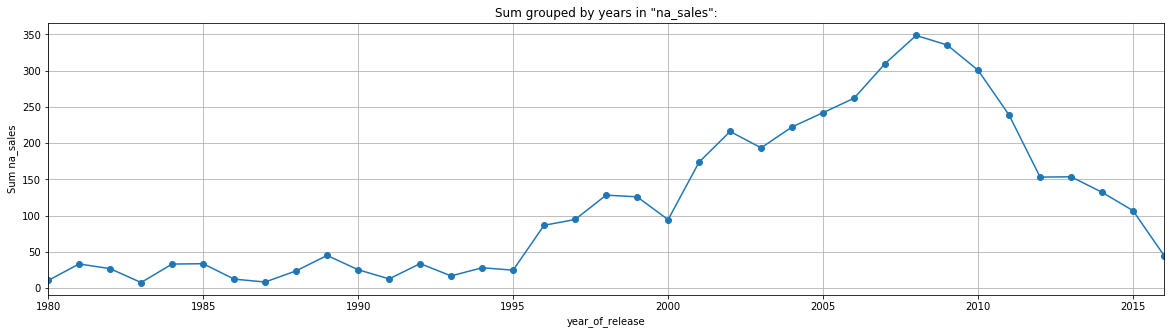

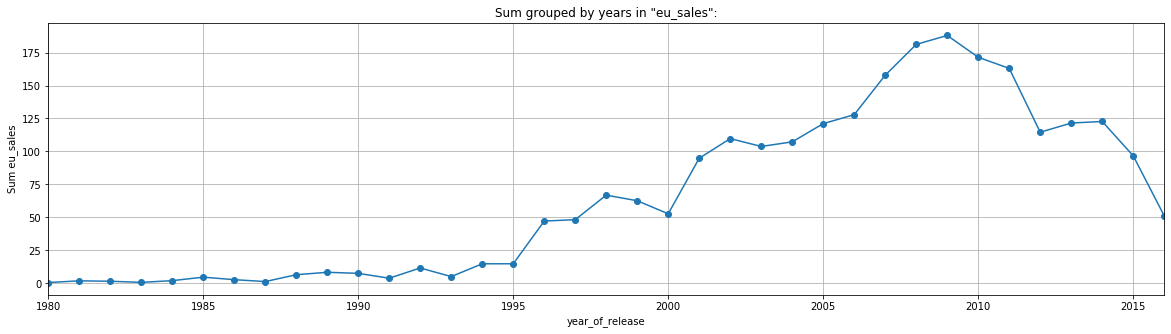

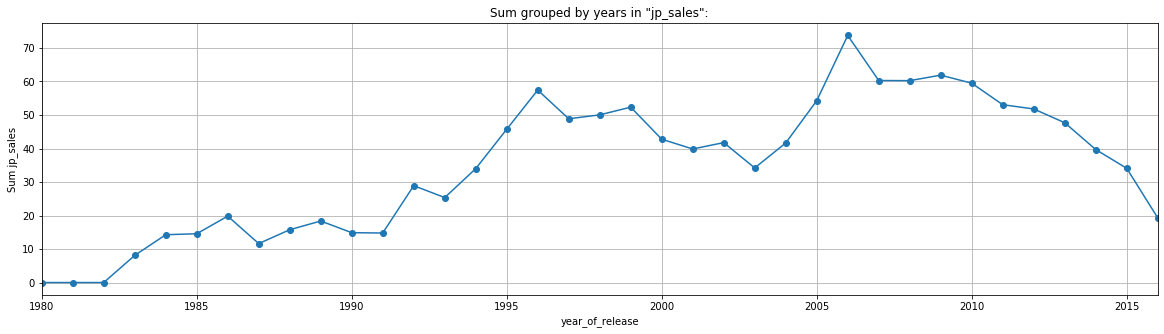

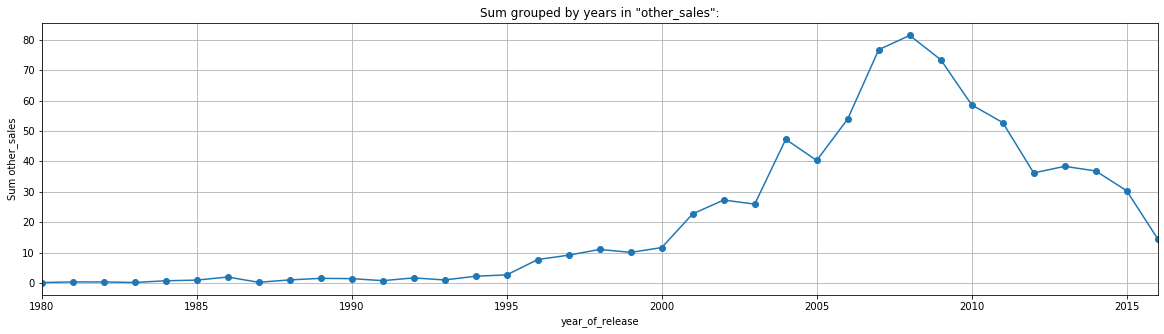

In [5]:
import matplotlib.pyplot as plt
df.groupby('year_of_release')['na_sales'].sum().plot(style = 'o-', grid = True, figsize = (20, 5)).set_title('Sum grouped by years in "na_sales":')
ax = plt.gca()
ax.set_ylabel('Sum na_sales')
plt.show()
df.groupby('year_of_release')['eu_sales'].sum().plot(style = 'o-', grid = True, figsize = (20, 5)).set_title('Sum grouped by years in "eu_sales":')
ax = plt.gca()
ax.set_ylabel('Sum eu_sales')
plt.show()
df.groupby('year_of_release')['jp_sales'].sum().plot(style = 'o-', grid = True, figsize = (20, 5)).set_title('Sum grouped by years in "jp_sales":')
ax = plt.gca()
ax.set_ylabel('Sum jp_sales')
plt.show()
df.groupby('year_of_release')['other_sales'].sum().plot(style = 'o-', grid = True, figsize = (20, 5)).set_title('Sum grouped by years in "other_sales":')
ax = plt.gca()
ax.set_ylabel('Sum other_sales')
plt.show()

Для того, чтобы узнать сколько игр выпускалось в разные годы в разных регионах была использована группировка данных методом groupby(). Для выяснения актуального периода, по которому можно строить прогноз выпуска игр на 2017 год построим графики сгруппированных данных, воспользовавшись методом plot(). Судя по графикам, актуальным можно считать период, начиная с 2012 года, так как после построения графиков можно заметить, что на каждом из них меняются линии на всех графиках, начиная именно где-то с 2012 года.

          sum_sales
platform           
PS2         1255.77
X360         971.42
PS3          939.65
Wii          907.51
DS           806.12


platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN
2000.0,NaN,39.17,NaN,NaN,NaN
2001.0,NaN,166.43,NaN,NaN,NaN
2002.0,NaN,205.38,NaN,NaN,NaN
2003.0,NaN,184.31,NaN,NaN,NaN
2004.0,17.27,211.81,NaN,NaN,NaN
2005.0,130.14,160.66,NaN,NaN,8.25
2006.0,119.81,103.42,20.96,137.15,51.62
2007.0,146.94,75.99,73.19,152.77,95.41


Text(0.5, 1.0, 'Sum sales grouped by years on the different platforms')

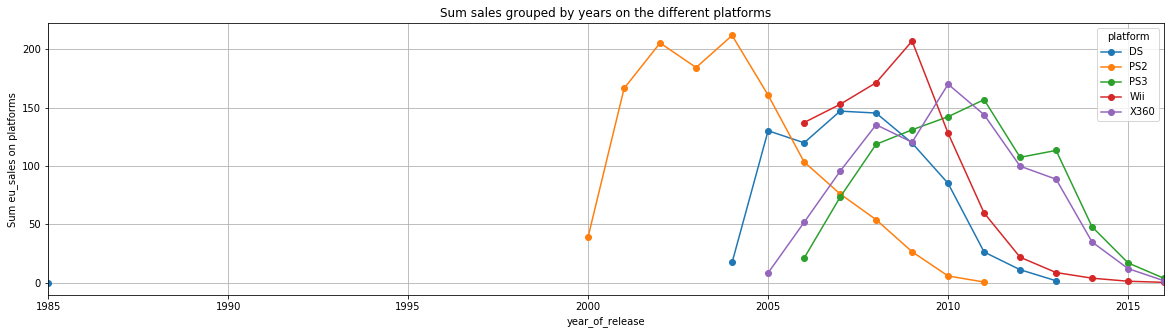

In [6]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
platform_group = df.groupby('platform')['sum_sales'].sum()
platform_group = pd.DataFrame(platform_group)
print(platform_group.sort_values('sum_sales', ascending = False).head())
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_pivot_table = df.query('platform == @top_platform')\
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
display(df_pivot_table)    
df_pivot_table.plot(style = 'o-', grid = True, figsize = (20, 5))
ax = plt.gca()
ax.set_ylabel('Sum eu_sales on platforms')
ax.set_title('Sum sales grouped by years on the different platforms')

Были выбраны платформы с наибольшими суммарными продажами. Ими оказались платформы 'PS2', 'X360', 'PS3', 'Wii', 'DS', по ним была составлена сводная таблица и график с суммарной прибылью по годам. По полученному графику можно сделать следующие выводы: характерный срок появления новых платформ обычно составляет 2-3 года, исчезания старых - 9-11 лет.

          sum_sales
platform           
PS4          314.14
PS3          288.79
X360         236.54
3DS          194.61
XOne         159.32
WiiU          82.19
PC            62.65
PSV           49.18
Wii           35.37
DS            12.55
PSP           11.19


platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2012.0,51.36,107.36,NaN,99.74,NaN
2013.0,56.57,113.25,25.99,88.58,18.96
2014.0,43.76,47.76,100.00,34.74,54.07
2015.0,27.78,16.82,118.90,11.96,60.14
2016.0,15.14,3.60,69.25,1.52,26.15


Text(0.5, 1.0, 'Sum sales grouped by years on the different platforms in the сurrent period')

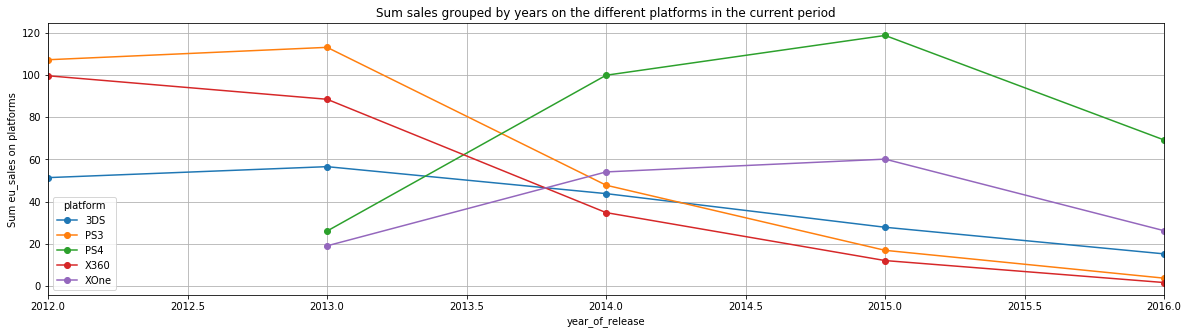

In [7]:
relevant_df = df.query('year_of_release >= 2012')
new_platform_group = relevant_df.groupby('platform')['sum_sales'].sum()
new_platform_group = pd.DataFrame(new_platform_group)
print(new_platform_group.sort_values('sum_sales', ascending = False))
new_top_platform = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
new_df_pivot_table = relevant_df.query('platform == @new_top_platform')\
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
display(new_df_pivot_table)    
new_df_pivot_table.plot(style = 'o-', grid = True, figsize = (20, 5))
ax = plt.gca()
ax.set_ylabel('Sum eu_sales on platforms')
ax.set_title('Sum sales grouped by years on the different platforms in the сurrent period')

В актуальное время лидирующими платформами являются 'PS4', 'PS3', 'X360', '3DS', 'XOne'. Согласно графику, платформы 'PS3', 'X360' и '3DS' заметно падают. Потенциально прибыльными можно назвать платформы 'PS4' и 'XOne'.

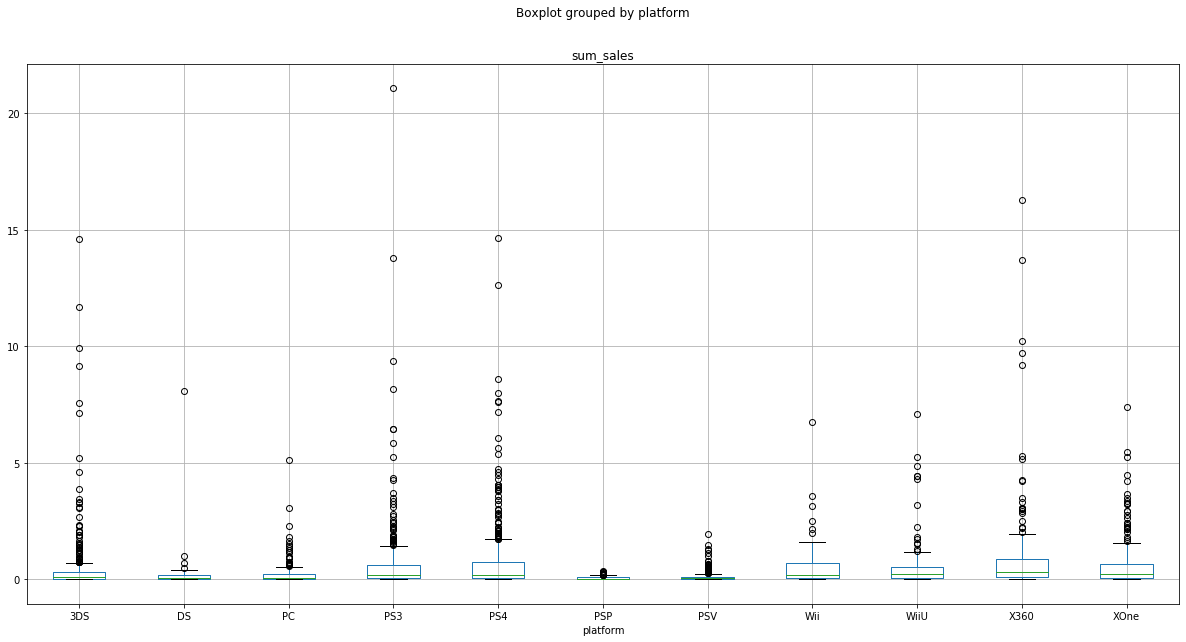

In [8]:
relevant_df.boxplot('sum_sales', by = 'platform', figsize = (20, 10))

По продажам игр в разбивке по платформам был построен "ящик с усами" с помощью метода boxplot(), благодаря которому стало известно, что от среднего значения больше всего отделяются суммы продаж платформ 'PS4', 'PS3', 'Wii', 'WiiU', 'X360'.

Корреляция между отзывами пользователей и продажами платформы 3DS: 0.19758263411038599
Корреляция между отзывами критиков и продажами платформы 3DS: 0.3208028695360785
Корреляция между отзывами пользователей и продажами платформы PS3: -0.005143522887113815
Корреляция между отзывами критиков и продажами платформы PS3: 0.3314972592629587


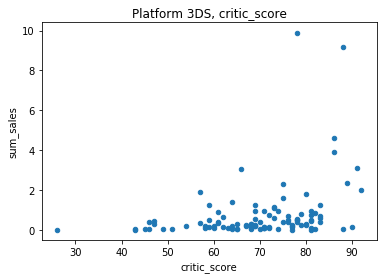

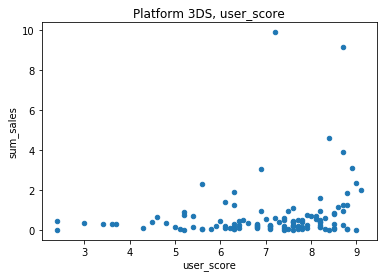

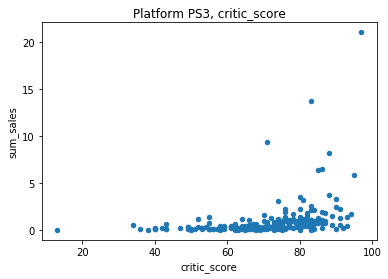

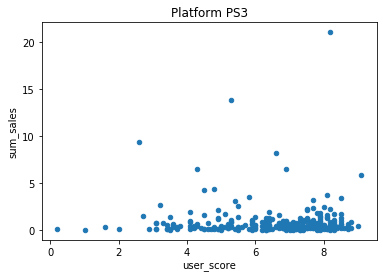

In [9]:
def popular_platform(plat, score, title):
    df_popular_platform = relevant_df.query('platform == @plat')
    df_popular_platform.plot(x = score, y = 'sum_sales', kind = 'scatter').set_title(title)
popular_platform("3DS", 'critic_score', 'Platform 3DS, critic_score')
popular_platform("3DS", 'user_score', 'Platform 3DS, user_score')
popular_platform("PS3", 'critic_score', 'Platform PS3, critic_score')
popular_platform("PS3", 'user_score', 'Platform PS3')
platform_ds = relevant_df.query('platform == "3DS"')
platform_ps = relevant_df.query('platform == "PS3"')
print('Корреляция между отзывами пользователей и продажами платформы 3DS:', platform_ds['user_score'].corr(platform_ds['sum_sales']))
print('Корреляция между отзывами критиков и продажами платформы 3DS:', platform_ds['critic_score'].corr(platform_ds['sum_sales']))
print('Корреляция между отзывами пользователей и продажами платформы PS3:', platform_ps['user_score'].corr(platform_ps['sum_sales']))
print('Корреляция между отзывами критиков и продажами платформы PS3:', platform_ps['critic_score'].corr(platform_ps['sum_sales']))

Чтобы посмотреть внутри одной платформы как отзывы критиков и пользователей влияют на продажи были построены диаграммы рассеяния и посчитаны корреляции между отзывами и продажами. Рассмотрим одну из популярных среди пользователей платформу "3DS": диаграммы показали, что чем больше оценка критиков и пользователей, тем больше продажи; хорошие продажи начинаются с оценки критиков 69-70, с оценки пользователей 7-7.1. Для того, чтобы убедиться в предположении побольше проведём те же исследования с платформой PS3, которые также показали, что чем больше оценки критиков, тем больше и продажи, между оценками пользователей и продажами особой связи нет. Пик продаж платформы PS3 приходится тогда, когда оценка критиков достигает также около 70 и когда оценка пользователей равна примерно 7. Благодаря посчитанной корреляции между отзывами и продажами можно понять, что во всех упомянутых объектах, кроме пользовательской оценки и продаж платформы PS3, взаимосвязь прямопропорциональная, но небольшая. Согласно исследованию, самая большая связь наблюдается между отзывами критиков и продажами платформы 3DS, и она равна примерно 0,18.

              sum_sales
genre                  
Action           441.12
Shooter          304.73
Role-Playing     192.80
Sports           181.07
Misc              85.04
Platform          61.00
Racing            53.50
Fighting          44.49
Simulation        35.12
Adventure         29.43
Strategy          13.34
Puzzle             4.89


genre,Action,Misc,Shooter,Sports
year_of_release,,,,
2012.0,119.25,22.22,71.75,30.42
2013.0,122.51,25.27,62.04,41.17
2014.0,97.23,23.38,65.21,45.15
2015.0,72.02,11.57,67.51,40.84
2016.0,30.11,2.60,38.22,23.49


Text(0.5, 1.0, 'Sum sales grouped by years on the different genres')

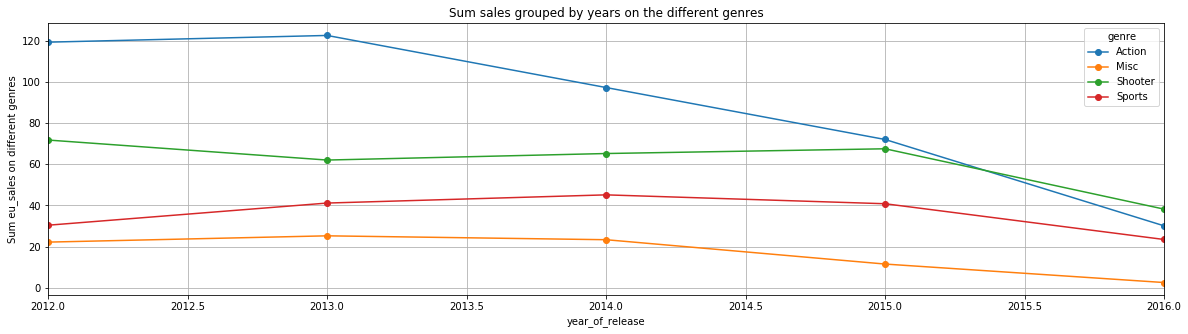

In [10]:
genre_group = relevant_df.groupby('genre')['sum_sales'].sum()
genre_group = pd.DataFrame(genre_group)
print(genre_group.sort_values('sum_sales', ascending = False))
top_genre = ['Action', 'Shooter', 'Role_Playing', 'Sports', 'Misc']
df_pivot_table = relevant_df.query('genre == @top_genre')\
    .pivot_table(index = 'year_of_release', columns = 'genre', values = 'sum_sales', aggfunc = 'sum')
display(df_pivot_table)    
df_pivot_table.plot(style = 'o-', grid = True, figsize = (20, 5))
ax = plt.gca()
ax.set_ylabel('Sum eu_sales on different genres')
ax.set_title('Sum sales grouped by years on the different genres')

В актуальное время самыми популярными жанрами являются: 'Action', 'Misc', 'Shooter', 'Sports' и 'Role-Playing'. Жанры 'Action', 'Shooter' и 'Sports' являются потенциально прибыльными, продажи жанра 'Misc' падают.

NA: количество продаж с различных платформ           na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31
WiiU         38.10
PC           19.12
Wii          17.45
PSV          10.98
DS            4.59
PSP           0.13

NA: количество продаж в зависимости от жанра               na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13

NA: количество продаж в зависимости от рейтинга         na_sales
rating          
M         231.57
E         114.37
-         103.31
E10+       75.70
T          66.02


rating,-,E,E10+,M,T
year_of_release,,,,,
2012.0,13.89,35.32,21.46,66.36,16.23
2013.0,24.70,28.31,21.01,68.79,10.84
2014.0,27.28,24.15,15.36,49.39,16.09
2015.0,28.91,18.62,14.06,31.36,13.91
2016.0,8.53,7.97,3.81,15.67,8.95


EU: количество продаж с различных платформ           eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64
PC           37.76
WiiU         25.13
Wii          11.92
PSV          11.36
DS            3.53
PSP           0.42

EU: количество продаж в зависимости от жанра               eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40

EU: количество продаж в зависимости от рейтинга         eu_sales
rating          
M         193.96
E         113.03
-          91.50
E10+       55.37
T          52.96


rating,-,E,E10+,M,T
year_of_release,,,,,
2012.0,12.59,29.67,12.68,48.64,11.01
2013.0,19.96,25.30,16.53,51.88,7.88
2014.0,23.24,23.23,14.62,47.90,13.75
2015.0,28.24,21.22,7.73,29.00,10.53
2016.0,7.47,13.61,3.81,16.54,9.79


JP: количество продаж с различных платформ           jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01
PSP          10.47
DS            3.72
Wii           3.39
X360          1.57
XOne          0.34
PC            0.00

JP: количество продаж в зависимости от жанра               jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44
Shooter           9.23
Platform          8.63
Adventure         8.24
Sports            8.01
Strategy          2.88
Racing            2.50
Puzzle            2.14

JP: количество продаж в зависимости от рейтинга         jp_sales
rating          
-         108.84
E          28.33
T          26.02
M          21.20
E10+        8.19


rating,-,E,E10+,M,T
year_of_release,,,,,
2012.0,23.79,13.19,2.30,7.09,5.43
2013.0,28.15,6.20,1.43,6.10,5.81
2014.0,24.01,3.69,1.19,3.72,7.08
2015.0,18.57,4.18,2.82,3.09,5.43
2016.0,14.32,1.07,0.45,1.20,2.27


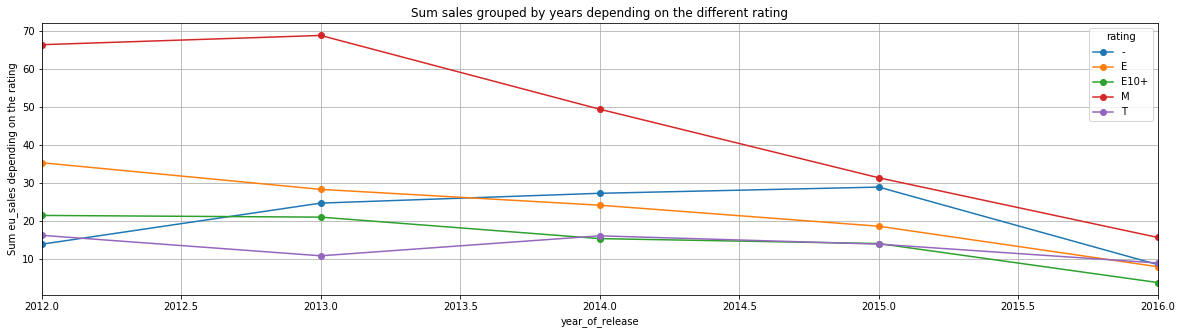

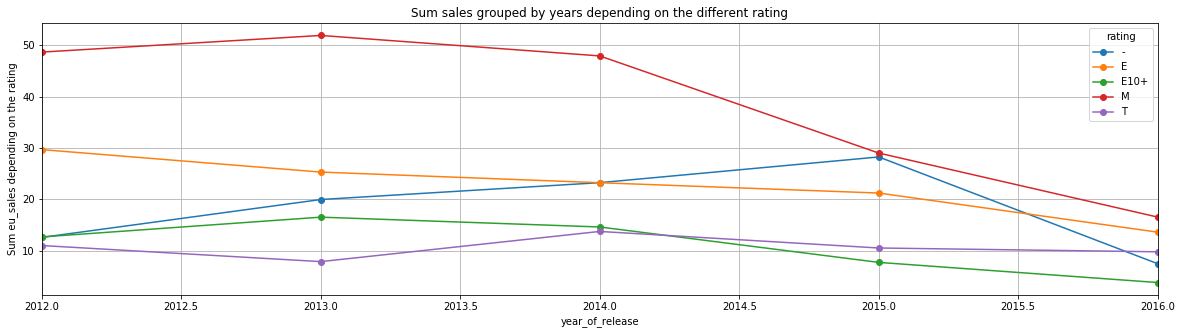

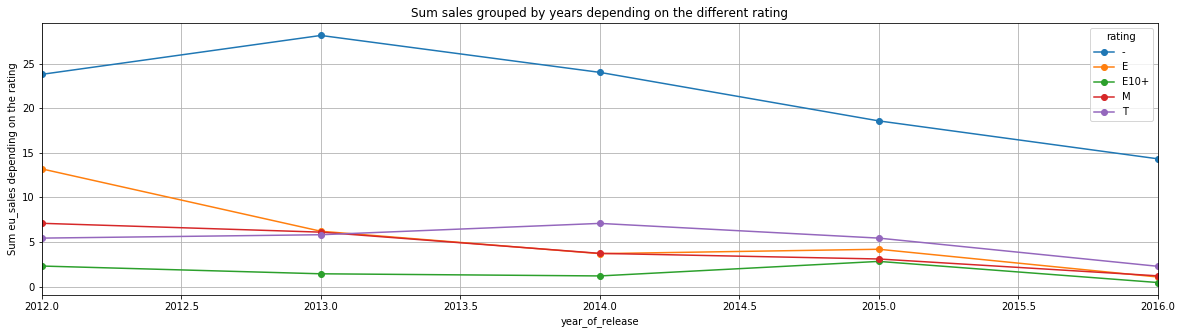

In [11]:
def portrait_of_region(a, a_name):
    platform_group = relevant_df.groupby('platform')[a].sum()
    platform_group = pd.DataFrame(platform_group)
    print(a_name, 'количество продаж с различных платформ', platform_group.sort_values(a, ascending = False))
    genre_group = relevant_df.groupby('genre')[a].sum()
    genre_group = pd.DataFrame(genre_group)
    print()
    print(a_name, 'количество продаж в зависимости от жанра', genre_group.sort_values(a, ascending = False))
    rating_group = relevant_df.groupby('rating')[a].sum()
    rating_group = pd.DataFrame(rating_group)
    print()
    print(a_name, 'количество продаж в зависимости от рейтинга', rating_group.sort_values(a, ascending = False))
    df_pivot_table = relevant_df\
        .pivot_table(index = 'year_of_release', columns = 'rating', values = a, aggfunc = 'sum')
    display(df_pivot_table)    
    df_pivot_table.plot(style = 'o-', grid = True, figsize = (20, 5))
    ax = plt.gca()
    ax.set_ylabel('Sum eu_sales depending on the rating')
    ax.set_title('Sum sales grouped by years depending on the different rating')
portrait_of_region('na_sales', 'NA:')
portrait_of_region('eu_sales', 'EU:')
portrait_of_region('jp_sales', 'JP:')

<p>Как меняются продажи в разных регионах в зависимости от платформы, жанра и рейтига:</p>
<p>В Северной Америке самыми популярными платформами для игр являются 'X360', 'PS4', 'PS3', самыми популярными жанрами - 'Action', 'Shooter', 'Sports'. Самые популярные платформы в Европе - 'PS4', 'PS3', 'X360', жанры - 'Action', 'Shooter', 'Sports' также как и в Америке. В Японии топ-3 самых популярных платформ и жанров отличается от Европы и Северной Америки, что касается популярных платформ, то там это '3DS', 'PS3', 'PSV'; самые популярные жанры в Японии - 'Role_Playing', 'Action', 'Misc'.</p>
<p>В Европе и Северной Америке продажи бывают очень хорошими, если рейтинг равен M, в Японии - если рейтинг равен E или T. </p>
<p>Учитывая все вышеупомянутые факты, напрашивается следующий вывод: "Портреты пользователей в разных регионах разные".</p>

In [12]:
from scipy import stats as st
X_One = relevant_df.query('platform == "XOne"')
PC = relevant_df.query('platform == "PC"')
sample_1 = X_One['user_score']
sample_2 = PC['user_score']
display(sample_1)
alpha = .05
results = st.ttest_ind(sample_1, sample_2, equal_var = False, nan_policy='omit')
print('Проверка гипотезы: Cредний пользовательский рейтинг платформы Xbox_One равен среднему пользовательскому рейтингу платформы PC:')
print('p-значение:', results.pvalue)
if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна')
print()
from scipy import stats as st
Action = relevant_df.query('genre == "Action"')
Sports = relevant_df.query('genre == "Sports"')
sample_1 = Action['user_score']
sample_2 = Sports['user_score']
print(sample_1)
print(sample_2)
alpha = .05
results = st.ttest_ind(sample_1, sample_2, equal_var = False, nan_policy='omit')
print('Проверка гипотезы: Cредний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports:')
print('p-значение:', results.pvalue)
if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна')

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64

Проверка гипотезы: Cредний пользовательский рейтинг платформы Xbox_One равен среднему пользовательскому рейтингу платформы PC:
p-значение: 0.5489537965134426
Нулевая гипотеза верна

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16680    NaN
16691    NaN
16692    7.6
16699    NaN
16710    NaN
Name: user_score, Length: 1031, dtype: float64
77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16428    NaN
16450    4.5
16518    1.4
16638    NaN
16643    6.6
Name: user_score, Length: 268, dtype: float64
Проверка гипотезы: Cредний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports:
p-значение: 4.2430777657264175e-20
Отвергаем нулевую гипотезу


<p>Проверить гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":</p>
<p>Нулевая гипотеза: cредний пользовательский рейтинг платформы Xbox_One равен среднему пользовательскому рейтингу платформы PC.</p>
<p>Альтернативная гипотеза: cредний пользовательский рейтинг платформы Xbox_One не равен среднему пользовательскому рейтингу платформы PC.</p>
<p>Проверить гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные":</p>
<p>Нулевая гипотеза: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.</p>
<p>Альтернативная гипотеза: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.</p>

<div class="alert alert-block alert-success">
<p><b>Общий вывод:</b></p>
<p>В разных районах продажи проходят по-разному и могут зависеть по-разному от одних и тех же вещей.</p>
<p>Также продажи в разное время отличаются друг от друга. За актуальный период, который сможет дать представление о статистике 2017, выбрано время, начиная с 2012 года.</p>
<p>Продажи зависят от платформы. Характерный срок появления новых платформ обычно составляет 2-3 года, исчезания старых - 9-11 лет.</p>
<p>Продажи на различных платформах не сильно зависят от отзывов пользователей и критиков</p>
<p>Продажи также зависят от жанра игры, где самыми популярными являются 'Action', 'Misc', 'Shooter', 'Sports' и 'Role-Playing'</p>
<p>Cредний пользовательский рейтинг платформы Xbox_One не равен среднему пользовательскому рейтингу платформы PC.Cредний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports</p>